# Задача 8. Вычисление логарифма плотности многомерного нормального распределения

In [3]:
import task8
import numpy as np
import math
import IPython
from scipy import stats
import scipy

## Тестирование реализаций с помощью unittest

In [2]:
import unittest

### I вариант - без векторизации

In [5]:
class TestNvec(unittest.TestCase):
    def test_prim(self):
        """ Primitive test to check the correctness of solution"""
        X = np.random.random((10, 5))
        m = np.sum(X, 0)/len(X)
        C = (X-m).T.dot(X-m)/(len(X)-1)      
        answer_mat = scipy.stats.multivariate_normal(m, C).logpdf(X)

        np.testing.assert_array_almost_equal(task8.lpdf_nvec(X, m, C), answer_mat, decimal=12)
        
    def test_mid(self):
        """ Test to check solution on middle-sized data"""
        X = np.random.random((100, 5))
        m = np.sum(X, 0)/len(X)
        C = (X-m).T.dot(X-m)/(len(X)-1)      
        answer_mat = scipy.stats.multivariate_normal(m, C).logpdf(X)

        np.testing.assert_array_almost_equal(task8.lpdf_nvec(X, m, C), answer_mat, decimal=12)
        
    def test_big(self):
        """ Test to check solution on big data"""
        X = np.random.random((1000, 5))
        m = np.sum(X, 0)/len(X)
        C = (X-m).T.dot(X-m)/(len(X)-1)      
        answer_mat = scipy.stats.multivariate_normal(m, C).logpdf(X)

        np.testing.assert_array_almost_equal(task8.lpdf_nvec(X, m, C), answer_mat, decimal=12)

In [6]:
test_nvec = TestNvec()
suite_nvec = unittest.TestLoader().loadTestsFromModule(test_nvec)
print (unittest.TextTestRunner().run(suite_nvec))

...

<unittest.runner.TextTestResult run=3 errors=0 failures=0>



----------------------------------------------------------------------
Ran 3 tests in 0.298s

OK


### II вариант - с векторизацией

In [8]:
class TestVec(unittest.TestCase):
    def test_prim(self):
        """ Primitive test to check the correctness of solution"""
        X = np.random.random((10, 5))
        m = np.sum(X, 0)/len(X)
        C = (X-m).T.dot(X-m)/(len(X)-1)      
        answer_mat = scipy.stats.multivariate_normal(m, C).logpdf(X)

        np.testing.assert_array_almost_equal(task8.lpdf_vec(X, m, C), answer_mat, decimal=12)
        
    def test_mid(self):
        """ Test to check solution on middle-sized data"""
        X = np.random.random((100, 5))
        m = np.sum(X, 0)/len(X)
        C = (X-m).T.dot(X-m)/(len(X)-1)      
        answer_mat = scipy.stats.multivariate_normal(m, C).logpdf(X)

        np.testing.assert_array_almost_equal(task8.lpdf_vec(X, m, C), answer_mat, decimal=12)
        
    def test_big(self):
        """ Test to check solution on big data"""
        X = np.random.random((1000, 5))
        m = np.sum(X, 0)/len(X)
        C = (X-m).T.dot(X-m)/(len(X)-1)      
        answer_mat = scipy.stats.multivariate_normal(m, C).logpdf(X)

        np.testing.assert_array_almost_equal(task8.lpdf_vec(X, m, C), answer_mat, decimal=12)

In [9]:
test_vec = TestVec()
suite_vec = unittest.TestLoader().loadTestsFromModule(test_vec)
print (unittest.TextTestRunner().run(suite_vec))

...

<unittest.runner.TextTestResult run=3 errors=0 failures=0>



----------------------------------------------------------------------
Ran 3 tests in 0.087s

OK


### III вариант - гибридная реализация

In [10]:
class TestHybr(unittest.TestCase):
    def test_prim(self):
        """ Primitive test to check the correctness of solution"""
        X = np.random.random((10, 5))
        m = np.sum(X, 0)/len(X)
        C = (X-m).T.dot(X-m)/(len(X)-1)      
        answer_mat = scipy.stats.multivariate_normal(m, C).logpdf(X)

        np.testing.assert_array_almost_equal(task8.lpdf_hybr(X, m, C), answer_mat, decimal=12)
        
    def test_mid(self):
        """ Test to check solution on middle-sized data"""
        X = np.random.random((100, 5))
        m = np.sum(X, 0)/len(X)
        C = (X-m).T.dot(X-m)/(len(X)-1)      
        answer_mat = scipy.stats.multivariate_normal(m, C).logpdf(X)

        np.testing.assert_array_almost_equal(task8.lpdf_hybr(X, m, C), answer_mat, decimal=12)
        
    def test_big(self):
        """ Test to check solution on big data"""
        X = np.random.random((1000, 5))
        m = np.sum(X, 0)/len(X)
        C = (X-m).T.dot(X-m)/(len(X)-1)      
        answer_mat = scipy.stats.multivariate_normal(m, C).logpdf(X)

        np.testing.assert_array_almost_equal(task8.lpdf_hybr(X, m, C), answer_mat, decimal=12)

In [11]:
test_hybr = TestHybr()
suite_hybr = unittest.TestLoader().loadTestsFromModule(test_hybr)
print (unittest.TextTestRunner().run(suite_hybr))

...

<unittest.runner.TextTestResult run=3 errors=0 failures=0>



----------------------------------------------------------------------
Ran 3 tests in 0.161s

OK


## Дискретные тесты (на основе тестов из unittest)

### I вариант - без векторизации

In [100]:
X1 = np.random.random ((10, 5))
m1 = np.sum(X1, 0) / len(X1)
C1 = (X1-m1).T.dot(X1-m1) / (len(X1)-1)

%timeit lpdf_nvec (X1, m1, C1)

X2 = np.random.random ((100, 5))
m2 = np.sum(X2, 0) / len(X2)
C2 = (X2-m2).T.dot(X2-m2) / (len(X2)-1)

%timeit lpdf_nvec (X2, m2, C2)

X3 = np.random.random ((1000, 5))
m3 = np.sum(X3, 0) / len(X3)
C3 = (X3-m3).T.dot(X3-m3) / (len(X3)-1)

%timeit lpdf_nvec(X3, m3, C3)

1000 loops, best of 3: 214 µs per loop
100 loops, best of 3: 1.84 ms per loop
100 loops, best of 3: 19.2 ms per loop


### II вариант - с векторизацией

In [71]:
def lpdf_vec (X, m, C):
    dim = len(X[0])
    invC = np.linalg.inv (C)
    dmat = X-m
    return np.diag(-0.5 * (np.log(np.linalg.det(C) * (2*math.pi)**dim) + (np.matmul(np.matmul(dmat, invC) , dmat.T) )))

In [101]:
%timeit lpdf_vec(X1, m1, C1)

%timeit lpdf_vec(X2, m2, C2)

%timeit lpdf_vec(X3, m3, C3)

The slowest run took 6.86 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 52.5 µs per loop
10000 loops, best of 3: 147 µs per loop
100 loops, best of 3: 11.9 ms per loop


### III вариант - гибридная реализация

In [85]:
def lpdf_hybr (X, m, C): 
    num = len(X)
    dim = len(X[0])
    invC = np.linalg.inv (C)
    log_coeff = math.log(np.linalg.det(C) * (2*math.pi)**dim)
    X = X-m

    total_vec = []
    for xitem in X:
        total_sum = 0.0
        for i in range(dim):
            dot_sum = 0.0
            for j in range(dim):
                dot_sum += xitem[j] * invC[i][j]
            total_sum += np.dot(xitem, invC[i]) * xitem[i]
        total_vec.append (-0.5 * (total_sum + log_coeff))
        
    return total_vec

In [102]:
%timeit lpdf_hybr(X1, m1, C1)

%timeit lpdf_hybr(X2, m2, C2)

%timeit lpdf_hybr(X3, m3, C3)

1000 loops, best of 3: 293 µs per loop
100 loops, best of 3: 2.67 ms per loop
10 loops, best of 3: 26.9 ms per loop


### IV вариант - стандартная функция библиотеки SciPy

In [105]:
%timeit scipy.stats.multivariate_normal(m1, C1).logpdf(X1)

%timeit scipy.stats.multivariate_normal(m2, C2).logpdf(X2)

%timeit scipy.stats.multivariate_normal(m3, C3).logpdf(X3)

The slowest run took 4.75 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 290 µs per loop
1000 loops, best of 3: 214 µs per loop
1000 loops, best of 3: 293 µs per loop


## Непрерывные тесты

In [2]:
import time
import matplotlib.pyplot as plt

In [21]:
def get_measures (begin, end, step):
    x_axis = []
    nvec_dots = []
    vec_dots = []
    hybr_dots = []
    scpy_dots = []
    start = time.time()
    
    
    
    for i in range (begin, end, step):
        X = np.random.randn (i, 5)
        m = np.sum(X, 0) / len(X)
        C = (X-m).T.dot(X-m) / (len(X)-1)
        while np.linalg.det(C) == 0:
            X = np.random.randn (i, 5)
            m = np.sum(X, 0) / len(X)
            C = (X-m).T.dot(X-m) / (len(X)-1)
            
        x_axis.append(i)
        
        start = time.time()
        task8.lpdf_nvec(X, m, C)
        nvec_dots.append(time.time()-start)

        start = time.time()
        task8.lpdf_vec(X, m, C)
        vec_dots.append(time.time()-start)

        start = time.time()
        task8.lpdf_hybr(X, m, C)
        hybr_dots.append(time.time()-start)
        
        start = time.time()
        scipy.stats.multivariate_normal(m, C).logpdf(X)
        scpy_dots.append(time.time()-start)
    
    return (x_axis, nvec_dots, vec_dots, hybr_dots, scpy_dots)

In [27]:
x_axis, nvec_dots, vec_dots, hybr_dots, scpy_dots = get_measures (100, 1000, 50)

plt.plot(x_axis, nvec_dots, "r-", label="non-vectorized", antialiased=False)
plt.plot(x_axis, vec_dots, "g-", label="vectorized", antialiased=False)
plt.plot(x_axis, hybr_dots, "b-", label="hybrid", antialiased=False)
plt.plot(x_axis, scpy_dots, "k-", label="scipy", antialiased=False)
plt.xlabel("matrix size")
plt.ylabel("time(sec)")
plt.legend()
plt.show()

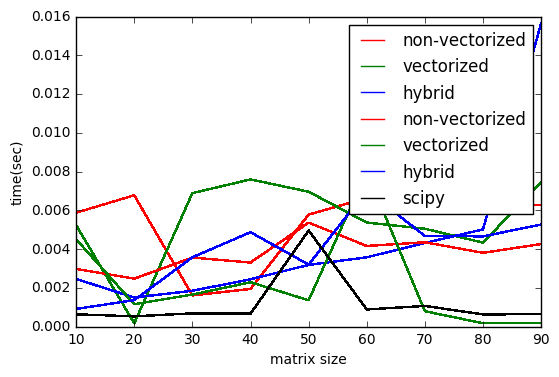

In [25]:
x_axis, nvec_dots, vec_dots, hybr_dots, scpy_dots = get_measures (10, 100, 10)

plt.plot(x_axis, nvec_dots, "r-", label="non-vectorized", antialiased=False)
plt.plot(x_axis, vec_dots, "g-", label="vectorized", antialiased=False)
plt.plot(x_axis, hybr_dots, "b-", label="hybrid", antialiased=False)
plt.plot(x_axis, scpy_dots, "k-", label="scipy", antialiased=False)
plt.xlabel("matrix size")
plt.ylabel("time(sec)")
plt.legend()
plt.show()